# Chapter 2

## Set Up

### Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

### Defaults

In [2]:
# seaborn defaults
sns.set(
    style="whitegrid",
    font_scale=1.2,
    rc={
        "axes.edgecolor": "0",
        "axes.grid.which": "both",
        "axes.labelcolor": "0",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "xtick.bottom": True,
        "ytick.left": True,
    },
)

colors = sns.color_palette()

# Exercises

## Easy

### 2E1

Which of the expressions below correspond to the statement: *the probability of rain on Monday*?  
1. $\text{Pr}(\text{rain})$
2. $\text{Pr}(\text{rain}\mid\text{Monday})$
3. $\text{Pr}(\text{Monday}\mid\text{rain})$
4. $\text{Pr}(\text{rain},\text{Monday}) \big/ \text{Pr}(\text{Monday})$

---

(2) and (4)

### 2E2

Which of the following statements corresponds to the expression: $\text{Pr}(\text{Monday}\mid\text{rain})$?  
1. The probability of rain on Monday.  
2. The probability of rain, given that it is Monday.  
3. The probability that it is Monday, given that it is raining.  
4. The probability that it is Monday and that it is raining.

---

(3)

### 2E3

Which of the following expressions below correspond to the statement: *the probability that it is Monday, given that it is raining*?  
1. $\text{Pr}(\text{Monday}\mid\text{rain})$
2. $\text{Pr}(\text{rain}\mid\text{Monday})$
3. $\text{Pr}(\text{rain}\mid\text{Monday}) \cdot \text{Pr}(\text{Monday})$
4. $\text{Pr}(\text{rain}\mid\text{Monday}) \cdot \text{Pr}(\text{Monday}) \big/ \text{Pr}(\text{rain})$
5. $\text{Pr}(\text{Monday}\mid\text{rain}) \cdot \text{Pr}(\text{rain}) \big/ \text{Pr}(\text{Monday})$

---

(1) and (4)

### 2E4

The Bayesian statistician Bruno de Finetti (1906--1985) began his 1973 book on probability theory with the dedication: "PROBABILITY DOES NOT EXIST." The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this statement. What does it mean to say "the probability of water is 0.7"?

---

When we say "the probability of water is 0.7" we mean that the outcome of tossing the globe is uncertain, but we are more confident that we will get water than land. 
The value 0.7 makes precise that confidence - we are 7/3 times as confident that we will see water rather than land.

## Medium

### 2M1

Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for $p$.
1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

---

In [3]:
def plot_grid_approximate_prior_likelihood_and_posterior(prior, likelihood, posterior, grid):
    "Plot grid approximations of prior, likelihood, and posterior distributions"
    fig, axs = plt.subplots(ncols=3, figsize=(15, 4))

    dists = {
        "prior": prior,
        "likelihood": likelihood,
        "posterior": posterior,
    }
    for ax, (name, dist) in zip(axs, dists.items()):
        ax.plot(grid, dist)
        ax.set(title=name)

        ax.grid(False)
        ax.tick_params(
            axis='y',
            which='both',
            left=False,
            labelleft=False
        )
    
    return fig

In [4]:
def compute_and_plot_globe_tossing_posterior(obs, prior_rv=None, n_grid=101):
    """
    Plot grid approximate prior, likelihood, and posterior distributions for the globe tossing example
    with specifies prior distribution (defaults to uniform on [0, 1]).
    """
    if not prior_rv:
        prior_rv = stats.uniform()  
    
    obs = np.array(obs)
    if not np.isin(obs, ["W", "L"]).all():
        raise ValueError("Observations must be either 'W' or 'L")

    n_obs = len(obs)
    n_water = (obs == "W").sum()
                         
    grid = np.linspace(0, 1, n_grid)

    prior = prior_rv.pdf(grid)
    likelihood = stats.binom.pmf(n_water, n_obs, grid)

    posterior = likelihood * prior
    posterior /= posterior.sum()

    plot_grid_approximate_prior_likelihood_and_posterior(prior, likelihood, posterior, grid)
    
    return posterior

Observations:  ['W', 'W', 'W']


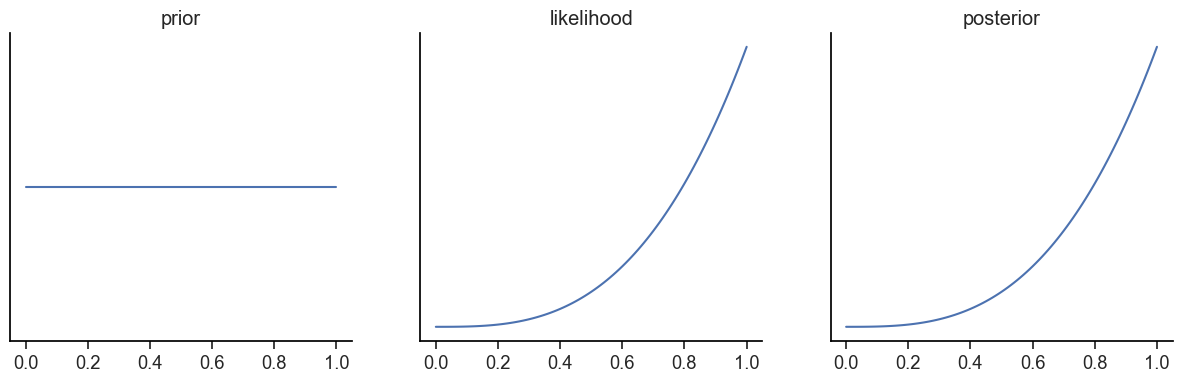

Observations:  ['W', 'W', 'W', 'L']


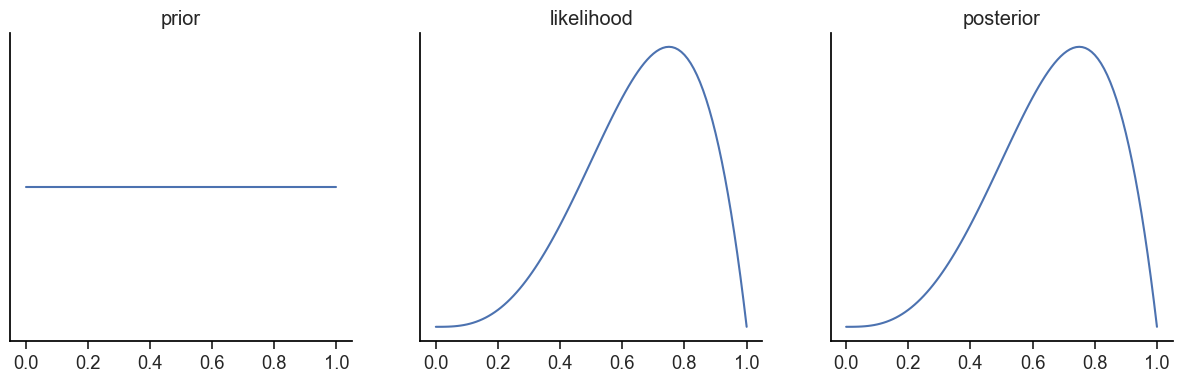

Observations:  ['L', 'W', 'W', 'L', 'W', 'W', 'W']


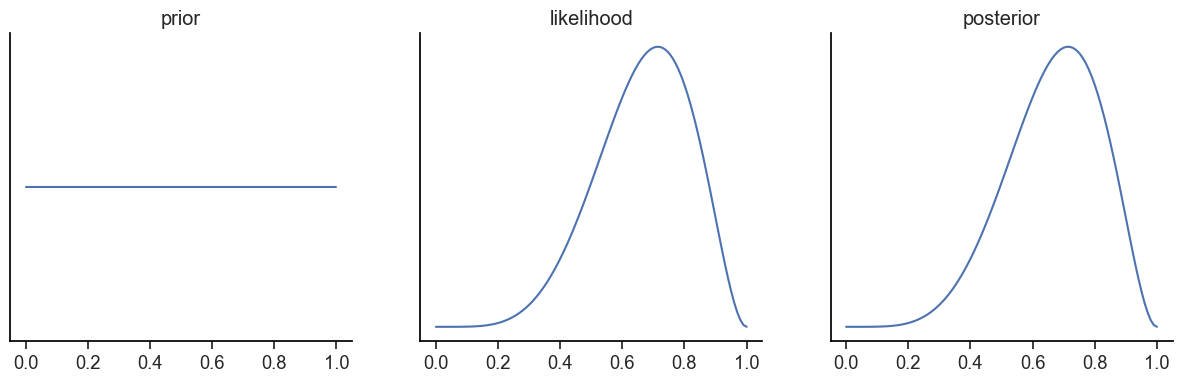

In [5]:
obs_list = [
    ["W", "W", "W"],
    ["W", "W", "W", "L"],
    ["L", "W", "W", "L", "W", "W", "W"],
]

for obs in obs_list:
    print("Observations: ", obs)
    compute_and_plot_globe_tossing_posterior(obs);
    plt.show(block=False)

### 2M2

Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and is a positive constant when $p \geq 0.5$. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

---

Observations:  ['W', 'W', 'W']


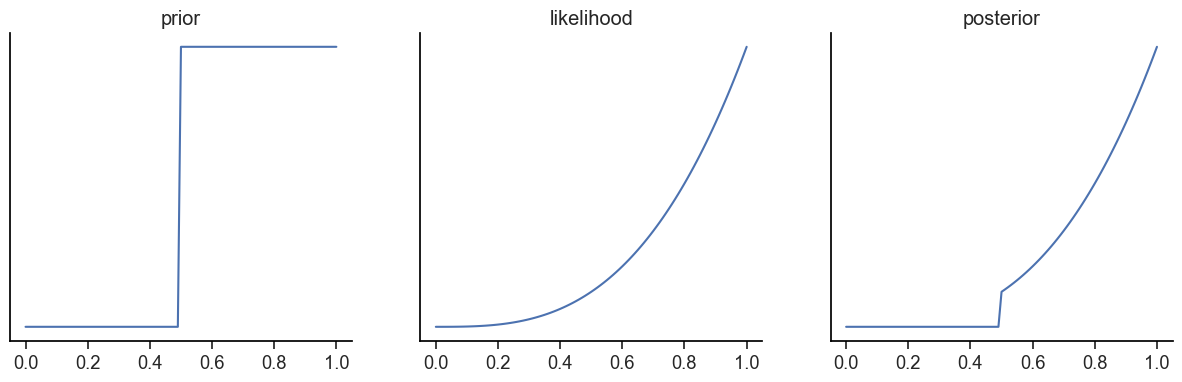

Observations:  ['W', 'W', 'W', 'L']


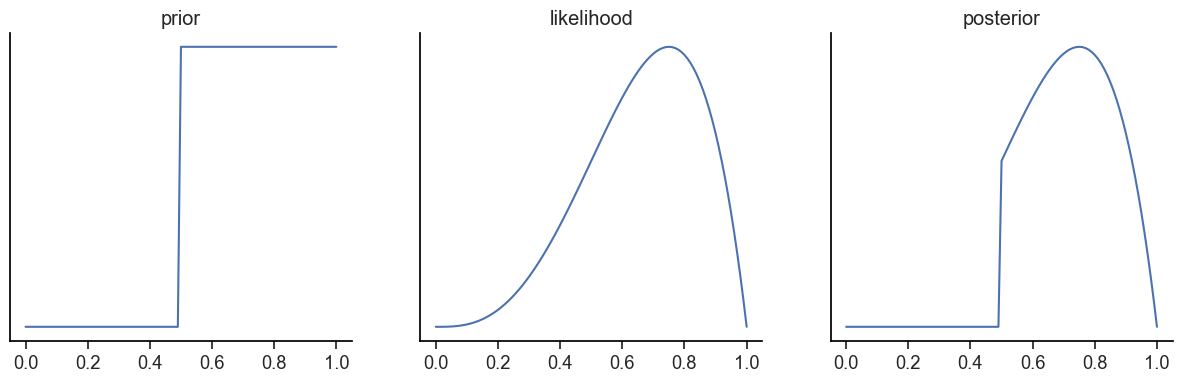

Observations:  ['L', 'W', 'W', 'L', 'W', 'W', 'W']


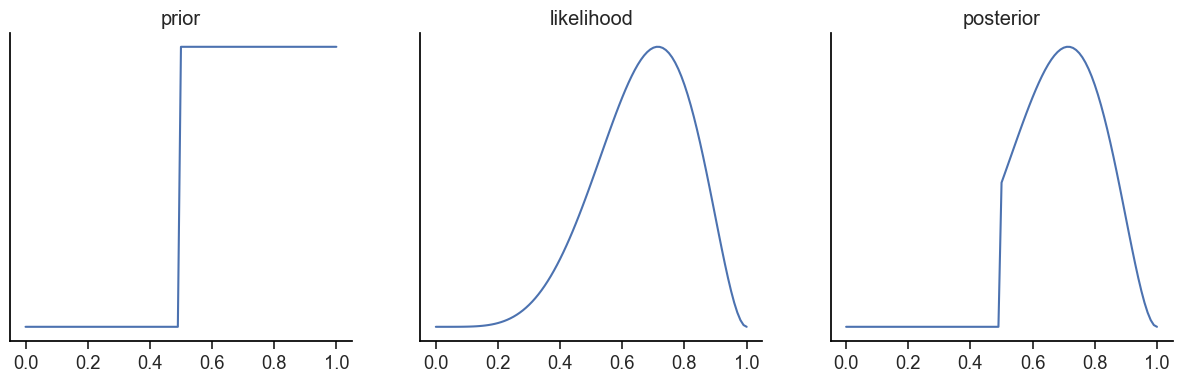

In [6]:
prior_rv = stats.uniform(0.5, 0.5)
obs_list = [
    ["W", "W", "W"],
    ["W", "W", "W", "L"],
    ["L", "W", "W", "L", "W", "W", "W"],
]

for obs in obs_list:
    print("Observations: ", obs)
    compute_and_plot_globe_tossing_posterior(obs, prior_rv);
    plt.show(block=False)

### 2M3

Suppose there are two globes, one for Earth and one for Mars.
The Earth globe is 70% covered in water.
The Mars globe is 100% land.
Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observatiion.
Assume that each globe was equally likely to be tossed.
Show that the posterior probability that the globe was the Earth, conditional on seeing “land” ($\text{Pr}(\text{Earth}\mid\text{land})$), is 0.23.

---

This is essentially the same as the previous example. The number of observations of water is a binomial distribution with probability of water equal to $p$. But now the prior for $p$ has probability masses of 0.5 at 0 and 0.7 and is 0 elsewhere:

\begin{equation}
    \text{P}(p=x) = 
        \begin{cases}
            0.5 & \text{ if } x=0, 0.7, \\
            0 & \text{ otherwise.}
        \end{cases}
\end{equation}

In [7]:
globe_idx = pd.Index(["Mars", "Earth"], name="globe")
grid = pd.Series(
    data=[0, 0.7],
    index=globe_idx,
)

prior = np.array([0.5, 0.5])
likelihood = pd.Series(
    stats.bernoulli.pmf(0, grid), # 0 observations of water with 1 trial
    index=globe_idx,
)

posterior = likelihood * prior
posterior /= posterior.sum()

posterior.round(3)

globe
Mars     0.769
Earth    0.231
dtype: float64

These are the posterior probabilities for $p$ being 0 and 0.7 respectively, that is the globe being Mars and Earth. Thus the posterior probability that the globe is the Earth is 0.23.

### 2M4

Suppose you have a deck with only three cards.
Each card has only two sides, and each side is either black or white.
One card has two black sides.
The second card has one black and one white side.
The third card has two white sides.
Now suppose all three cards are placed in a bag and shuffled.
Someone reaches into the bag and pulls out a card and places it flat on a table.
A black side is shown facing up, but you don’t know the color of the side facing down.
Show that the probability that the other side is also black is 2/3.
Use the counting method (Section 2 of the chapter) to approach this problem.
This means counting up the ways that each card could produce the observed data (a black side faceing up on the table).

---

With the all black card there are two ways the observed data could have been produced.
With the half black, half white card there is one.
With the all white card there are none.
So the black card accounts for 2/3 of the ways the observed data could have been produced and thus the probability that the other side is also black is 2/3.

### 2M5

Now suppose there are four cards: B/B, B/W, W/W, and another B/B.
Again suppose a card is drawn from the bag and a black side appears face up.
Again calculate the probability that the other side is black.

---

Now there are five ways the observed data could have been produced, four of which come from a B/B card.
So the probability that the other side is black is now 4/5.

### 2M6

Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides.
As a result, it’s less likely that a card with black sides is pulled from the bag.
So again assume there are three cards: B/B, B/W, and W/W.
After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card.
Again suppose that a card is pulled and a black side appears face up.
Show that the probability the other side is black is now 0.5.
Use the counting method, as before.

---

With the B/B card there are again two ways to produce the observed data.
With the B/W card there are also two; there are two 'ways' to pull the card and in each case one orientation of the card would produced the data.
There are still no ways that the W/W card could produce the data.
So the B/B card accounts for 1/2 of the ways the observed data could have been produced and thus the proability that the other side is also black is 1/2.

### 2M7

Assume again the original card problem, with a single card showing a black side face up.
Before looking at the other side, we draw another card from the bag and lay it face up on the table.
The face that is shown on the new card is white.
Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75.
Use the counting method, if you can.
Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

---

If the initial card is B/B there are six ways the observed data could be produced; the second card could be B/W with the white side showing or could be the W/W card with either side showing, and either side of the black card could be showing in each instance.
If the initial card is B/W there are two ways the observed data could be produced; the second card could be W/W with either side showing.
There is no way the W/W card could have produced the data.
Since six of the eight ways the data could have been produced result from the B/B card being chosen, there is a 0.75 chance that the original card was the B/B card.

## Hard

### 2H1

Suppose there are two species of panda bear.
Both are equally common in the wild and live in the same places.
They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart.
They differ however in their family sizes.
Species A gives birth to twins 10% of the time, otherwise birthing a single infant. 
Species births twins 20% of the time, ottherwise birthing singleton infants. 
Assume these numbers are known with certainty, from many years of field research.


Now suppose you are managing a captive panda breeding program. 
You have a new female panda of unknown species, and she has just given birth to twins. 
What is the probability that her next birth will also be twins?

---

The panda giving birth to twins is distributed as a Bernoulli variable with probability $p$, where $p$ is either 0.1 or 0.2.
Our prior is that $p$ has equal probability of taking either value.

In [8]:
species_idx = pd.Index(["A", "B"], name="species")
grid = pd.Series(
    data=[0.1, 0.2],
    index=species_idx,
)

prior = np.array([0.5, 0.5])
likelihood = pd.Series(
    stats.bernoulli.pmf(1, grid), # 1 observation of twins
    index=species_idx,
)

posterior = likelihood * prior
posterior /= posterior.sum()

posterior

species
A    0.333333
B    0.666667
dtype: float64

This gives the probabilities that the panda is of each species.
Now we find the marginal probability of twins, taking the sum over all possible values of $p$.

In [9]:
round((grid * posterior).sum(), 3)

0.167

So there is a 1/6 probability that the new birth with also be twins.

### 2H2

Recall all the facts from the problem above.
Now compute the probability that the panda we have is from species A, asssuming we have observed only the first birth and that it was twins.

---

From the posterior above, there is a 1/3 probability that the panda is from species A.

### 2H3

Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant.
Compute the posterior probability that this panda is species A.

---

In [10]:
species_idx = pd.Index(["A", "B"], name="species")
grid = pd.Series(
    data=[0.1, 0.2],
    index=species_idx,
)

prior = np.array([0.5, 0.5])
likelihood = pd.Series(
    stats.binom.pmf(1, 2, grid), # 1 observation of twins out of two experiments
    index=species_idx,
)

posterior = likelihood * prior
posterior /= posterior.sum()

round(posterior["A"], 3)

0.36

There is a probability of 0.36 that the panda is of species A.

### 2H4

A common boast of Bayesian statisticians is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.
So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. 
But the test, like all tests, is imperfect.
This is the information you have about the test:
- The probability it correctly identifies a species A panda is 0.8.
- The probability it correctly identifies a species B panda is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A.
First ignore your previous information from the births and compute the posterior probability that your panda is species A.
Then redo your calculation, now using the birth data as well.

---

The test being positive for species A is distributed as a Bernoulli variable with probability $p$ which takes values of either 0.8 or 0.65.
The prior for $p$ gives equal weight to each value.

In [11]:
species_idx = pd.Index(["A", "B"], name="species")
grid = pd.Series(
    data=[0.8, 0.35], # probability of identifying species B as A is 1 - 0.65
    index=species_idx,
)

prior = np.array([0.5, 0.5])
likelihood = pd.Series(
    stats.bernoulli.pmf(1, grid), # 1 positive test for species A
    index=species_idx,
)

posterior = likelihood * prior
posterior /= posterior.sum()

round(posterior["A"], 3)

0.696

With no other information, the probability that the panda is species A is around 0.70.

Since our parameter of interestis just whether the panda is of species A we can just do an additional update as in 2H1.

In [12]:
grid = pd.Series(
    data=[0.1, 0.2],
    index=species_idx,
)

likelihood = pd.Series(
    stats.binom.pmf(1, 2, grid), # 1 observation of twins out of two experiments
    index=species_idx,
)

posterior = likelihood * posterior
posterior /= posterior.sum()

round(posterior["A"], 3)

0.563

So the probability that the panda is of species A is 0.563.